# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [41]:
# Libraries
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

In [42]:
data = pd.read_csv('../data/absences.csv')

In [43]:
data.head()

,Unnamed: 0,EmployeeID,Age,Absences
0,0,1,27,15
1,1,2,61,6
2,2,3,37,10
3,3,4,23,18
4,4,5,46,9


[Text(0.5, 1.0, 'Absence per age'),
 Text(0, 0.5, 'Absences'),
 Text(0.5, 0, 'Age')]

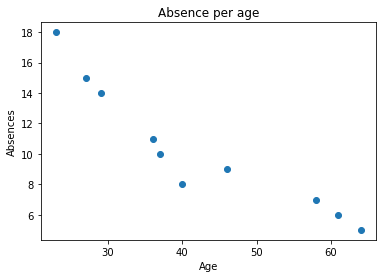

In [44]:
plt.scatter(x='Age',y='Absences',data=data)
plt.gca().set(title='Absence per age', ylabel='Absences', xlabel='Age')

In [45]:
# There is a linear relationship between ages and absences is: the younger the age, the more absences occur

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [46]:
def slope_intercept(x, y):
    slope = (np.mean(x*y) - (np.mean(x)*np.mean(y))) / ( np.mean(x*x) - np.mean(x)**2)
    intercept = np.mean(y) - np.mean(x)*slope
    return slope, intercept

In [47]:
slope, intercept = slope_intercept(data['Age'], data['Absences'])

print(slope)
print(intercept)

-0.26810883370334093
21.587381898910657


#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

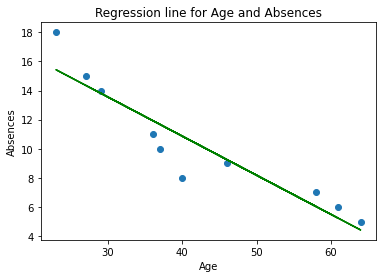

In [48]:
plt.plot(data['Age'],data['Age']*slope+intercept,c='g')
plt.scatter(data['Age'],data['Absences'])
plt.gca().set(title='Regression line for Age and Absences', ylabel='Absences', xlabel='Age')
plt.show()


In [49]:
#With the regression line we can confirm our previous results: Age and Absences have a clear linear relationship

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [50]:
def corr_cov(a, b):
    
    n = len(a)
    corr = (np.sum((a - np.mean(a))*(b - np.mean(b)))) / (np.sqrt(np.sum(np.power(a - (np.mean(a)), 2)) * np.sum(np.power(b - (np.mean(b)), 2))))
    cov = (np.sum ((a - np.mean(b))*(b - np.mean(b)))) / (n-1)
    
    return corr, cov

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [51]:
corr, cov = corr_cov(x,y)
corr, cov

(0.9770084209183943, 12.0)

In [52]:
# Very negative correlation between Age and Absences

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [53]:
#We can appreciate a very negative relationship between age and absences. The regression line confirms this
#We can truly confirm that age is an indicator of absenteeism: the younger the age, the most likely to absent

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [54]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [55]:
corr_cov(ironbeers_df['X'], ironbeers_df['Y'])

(0.9770084209183943, 12.0)

In [56]:
# Correlation close to the value 1 means there is a strenght linear relationship between this two variables.
# Covariance indicates the direction of the linear relationship between variables.


#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

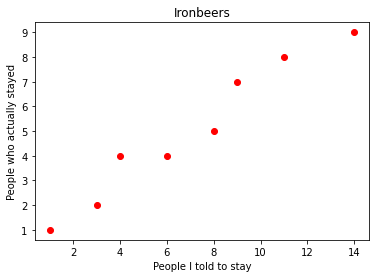

In [57]:
plt.scatter(x=ironbeers_df['X'], y=ironbeers_df['Y'],c='red')

plt.gca().set(title='Ironbeers', ylabel='People who actually stayed', xlabel='People I told to stay')
plt.show()


In [58]:
# We can observe the linear relationship mentioned before on the chart

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [59]:
slope, intercept = slope_intercept(x=ironbeers_df['X'],y=ironbeers_df['Y'])

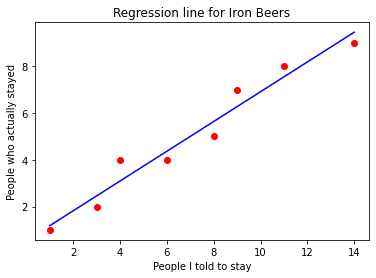

In [60]:
plt.plot(ironbeers_df['X'], ironbeers_df['Y'],'o',c='r')
plt.plot(ironbeers_df['X'], ironbeers_df['X']*slope + intercept,c='b')
plt.gca().set(title='Regression line for Iron Beers', ylabel='People who actually stayed', xlabel='People I told to stay')
plt.show()

In [61]:
# your comments here

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [62]:
#There's a positive relationship between this two variables so there will be other reasons for people not to stay.

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [63]:
# your code here

#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [64]:
# your code here

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [65]:
# your comments here

#### 4.- Remove the points with a high error and recalculate the regression line.

In [66]:
# your code here

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [67]:
# your code here

In [68]:
# your comments here